In [84]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [36]:
ls ../data

2013_-_Global_500_Emissions_and_Response_Status.csv
board_data.h5
company_SEC_disclosure.csv
ghgp_data_by_year_8_5_17.xlsx*
tickers.csv
tickers.xlsx*
us_emissions.h5


In [37]:
board_data = pd.read_hdf('../data/board_data.h5', 'board_data')
us_emissions = pd.read_hdf('../data/us_emissions.h5', 'us_emissions')

In [38]:
board_data.head()

,Company,2020 Rating,Total Board,# of women,% of Women,Sector,State,City,Company_clean
0,3M CO,NaN,11,2,18%,Industrials,Minnesota,ST. PAUL,3m
1,ABBOTT LABORATORIES,NaN,12,4,33%,Healthcare,Illinois,ABBOTT PARK,abbott laboratories
2,ADOBE SYSTEMS INC,NaN,10,2,20%,Technology,California,SAN JOSE,adobe systems
3,AFLAC INC,NaN,14,3,21%,Financial Services,Georgia,COLUMBUS,aflac
4,AIR PRODUCTS & CHEMICALS INC /DE/,NaN,8,2,25%,Basic Materials,Pennsylvania,ALLENTOWN,air products chemicals


In [39]:
us_emissions.head()

,Company,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean
0,3M Company,USA,70.0,D,4540000.0,2230000.0,MMM US,3m
2,Abbott Laboratories,USA,84.0,B,470781.0,537821.0,ABT US,abbott laboratories
6,"Adobe Systems, Inc.",USA,97.0,A,2744.0,22995.0,ADBE US,adobe systems
8,AFLAC Incorporated,USA,85.0,B,3884.0,18536.0,AFL US,aflac
11,"Air Products & Chemicals, Inc.",USA,99.0,B,14767209.0,10563030.0,APD US,air products chemicals


In [40]:
joined_df = pd.merge(us_emissions, board_data, on='Company_clean')

In [41]:
joined_df.head()

,Company_x,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector,State,City
0,3M Company,USA,70.0,D,4540000.0,2230000.0,MMM US,3m,3M CO,NaN,11,2,18%,Industrials,Minnesota,ST. PAUL
1,Abbott Laboratories,USA,84.0,B,470781.0,537821.0,ABT US,abbott laboratories,ABBOTT LABORATORIES,NaN,12,4,33%,Healthcare,Illinois,ABBOTT PARK
2,"Adobe Systems, Inc.",USA,97.0,A,2744.0,22995.0,ADBE US,adobe systems,ADOBE SYSTEMS INC,NaN,10,2,20%,Technology,California,SAN JOSE
3,AFLAC Incorporated,USA,85.0,B,3884.0,18536.0,AFL US,aflac,AFLAC INC,NaN,14,3,21%,Financial Services,Georgia,COLUMBUS
4,"Air Products & Chemicals, Inc.",USA,99.0,B,14767209.0,10563030.0,APD US,air products chemicals,AIR PRODUCTS & CHEMICALS INC /DE/,NaN,8,2,25%,Basic Materials,Pennsylvania,ALLENTOWN


In [42]:
joined_df = joined_df.sort_values(by='% of Women', ascending=True)

# Turn the percentages of women from a string into an integer
joined_df['% of Women'] = joined_df['% of Women'].apply(lambda x : int(re.sub('%', '', x)))

In [43]:
joined_df.head()

,Company_x,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector,State,City
67,"Noble Energy, Inc.",USA,76.0,C,2078600.00,61630.00,NBL US,noble energy,NOBLE ENERGY INC,NaN,10,1,10,Energy,Texas,HOUSTON
76,"Praxair, Inc.",USA,98.0,B,5355000.00,11329000.00,PX US,praxair,PRAXAIR INC,NaN,9,1,11,Basic Materials,Connecticut,DANBURY
49,HCP Inc.,USA,97.0,A-,28940.00,216887.00,HCP US,hcp,HCP INC.,NaN,8,1,13,Real Estate,California,IRVINE
64,Morgan Stanley,USA,96.0,A,13757.46,330746.62,MS US,morgan stanley,MORGAN STANLEY,NaN,14,2,14,Financial Services,New York,NEW YORK
35,Dow Chemical Company,USA,90.0,B,27429000.00,8403000.00,DOW US,dow chemical,DOW CHEMICAL CO /DE/,NaN,13,2,15,Basic Materials,Michigan,MIDLAND


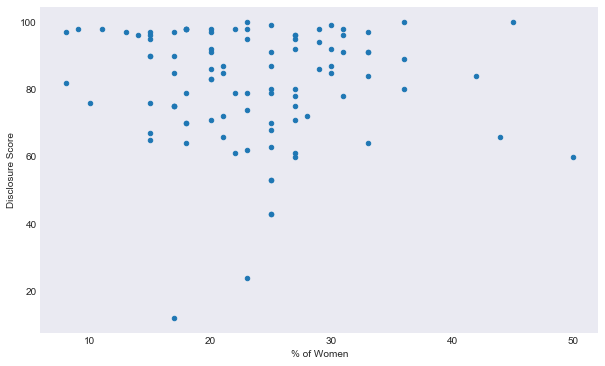

In [44]:
f, ax = plt.subplots()
joined_df.plot.scatter(x='% of Women', y='Disclosure Score', ax=ax);

In [45]:
joined_df.shape

(98, 16)

In [46]:
avg = joined_df.groupby('Sector').mean().sort_values('% of Women')

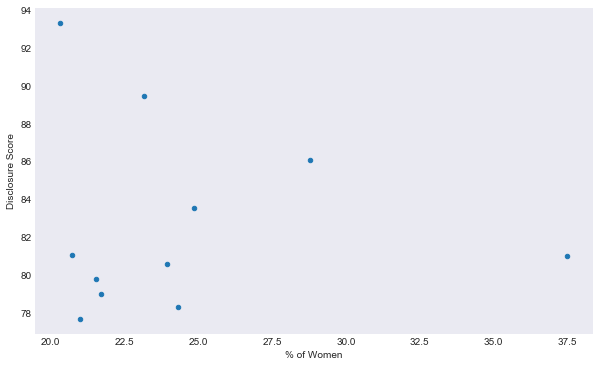

In [47]:
f, ax = plt.subplots()
avg.plot.scatter(x='% of Women', y='Disclosure Score', ax=ax);

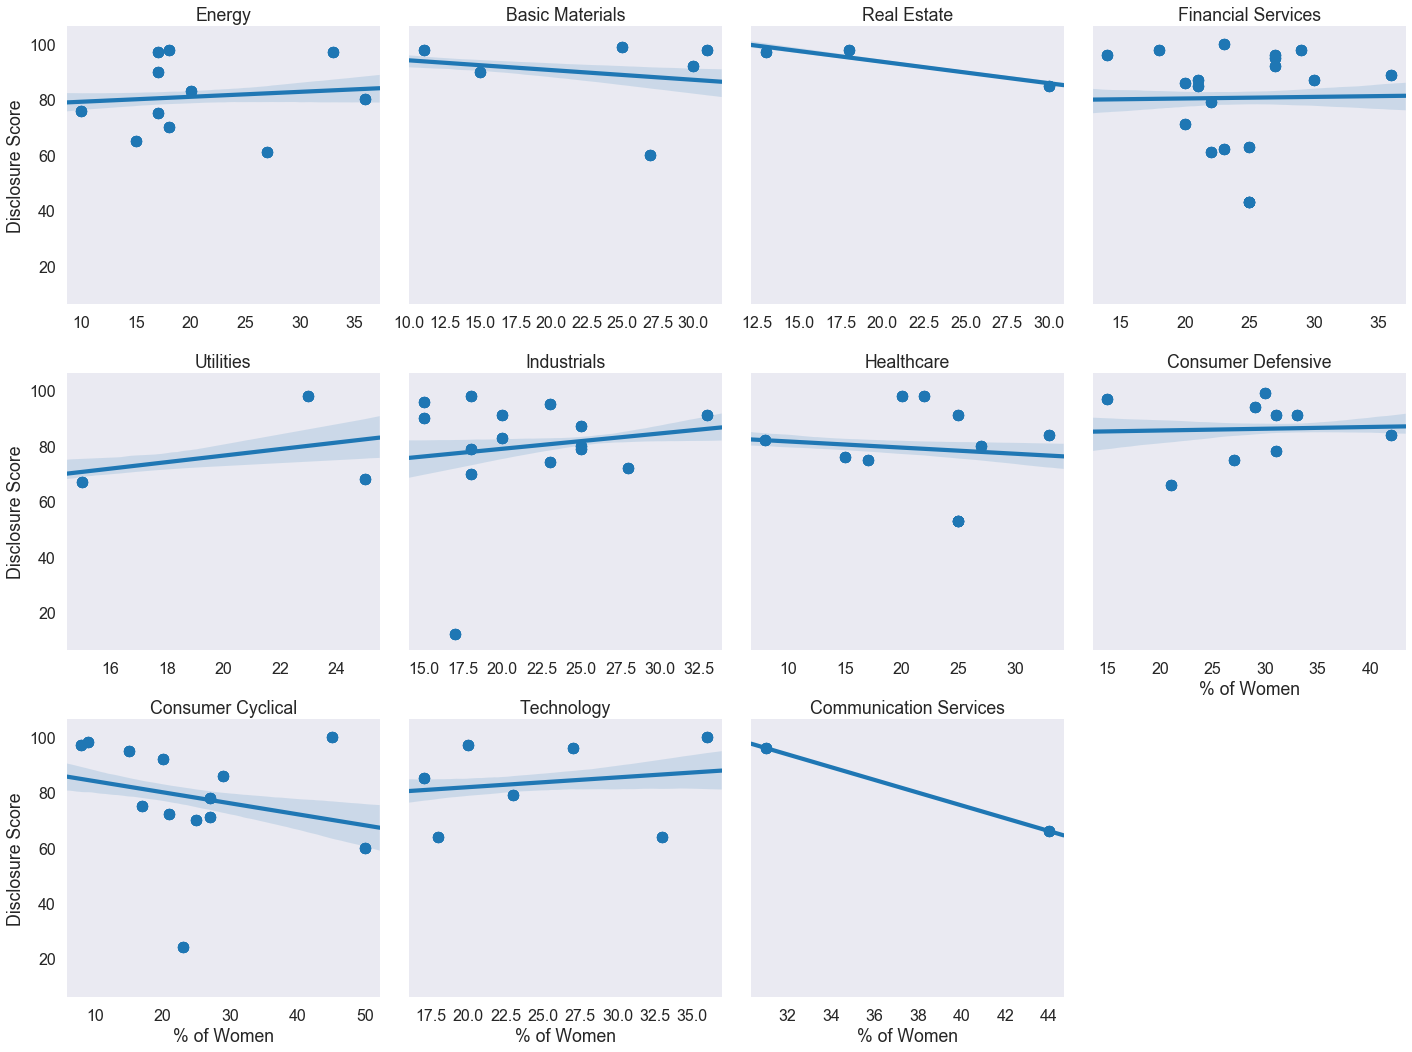

In [48]:
joined_melted = joined_df.melt(["Company_clean", "% of Women", 'Sector', 'Disclosure Score'])
with sns.plotting_context("poster"):    
    g = sns.lmplot(data=joined_melted, x="% of Women", y="Disclosure Score", 
                  col="Sector", col_wrap=4, scatter_kws={"alpha":.5},
                  sharex=False)
    g.set_titles("{col_name}");

In [49]:
disclosed = pd.read_hdf('disclosed.h5', 'disclosed')

In [50]:
disclosed.head(10)

,Company,Sector,Disclosed,Company_clean
0,3M CO,Medical Equipment Manufacturing,1,3m
1,ABBOTT LABORATORIES,Pharmaceuticals/Health Care,1,abbott laboratories
2,ABBVIE INC.,Pharmaceuticals/Health Care,0,abbvie
3,ACCENTURE PLC,Services - Business-Related,1,accenture plc
4,"ACTIVISION BLIZZARD, INC.",Information Technology,0,activision blizzard
5,ACUITY BRANDS INC,Electronics,1,acuity brands
6,ADOBE SYSTEMS INC,Information Technology,1,adobe systems
7,ADVANCE AUTO PARTS INC,Retail,1,advance auto parts
8,ADVANCED MICRO DEVICES INC,Electronics,0,advanced micro devices
9,AES CORP,Electric Power & Gas Utilities,1,aes


In [51]:
disclosed_join = pd.merge(disclosed, board_data, on='Company_clean')

In [52]:
disclosed_join.head()

,Company_x,Sector_x,Disclosed,Company_clean,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector_y,State,City
0,3M CO,Medical Equipment Manufacturing,1,3m,3M CO,NaN,11,2,18%,Industrials,Minnesota,ST. PAUL
1,ABBOTT LABORATORIES,Pharmaceuticals/Health Care,1,abbott laboratories,ABBOTT LABORATORIES,NaN,12,4,33%,Healthcare,Illinois,ABBOTT PARK
2,ADOBE SYSTEMS INC,Information Technology,1,adobe systems,ADOBE SYSTEMS INC,NaN,10,2,20%,Technology,California,SAN JOSE
3,AFLAC INC,Insurance Services,0,aflac,AFLAC INC,NaN,14,3,21%,Financial Services,Georgia,COLUMBUS
4,ALEXION PHARMACEUTICALS INC,Pharmaceuticals/Health Care,0,alexion pharmaceuticals,ALEXION PHARMACEUTICALS INC,NaN,10,2,20%,Healthcare,Connecticut,NEW HAVEN


In [53]:
disclosed_join.shape

(364, 12)

In [54]:
disclosed_join['% of Women'] = disclosed_join['% of Women'].apply(lambda x : int(re.sub('%', '', x)))

In [55]:
disclosed_join.groupby('Sector_y').mean()

,Disclosed,2020 Rating,Total Board,# of women,% of Women
Sector_y,,,,,
Basic Materials,1.000000,NaN,10.400000,2.333333,22.266667
Communication Services,0.571429,NaN,10.571429,2.428571,23.142857
Consumer Cyclical,0.705882,NaN,10.921569,2.745098,25.039216
Consumer Defensive,0.896552,NaN,11.413793,2.620690,22.620690
Energy,1.000000,NaN,10.419355,1.870968,17.677419
Financial Services,0.547170,NaN,12.188679,2.867925,23.641509
Healthcare,0.390244,NaN,10.414634,2.317073,22.439024
Industrials,0.725490,NaN,10.941176,2.254902,20.294118
Real Estate,0.842105,NaN,9.263158,1.894737,20.684211


In [68]:
top10 = joined_df.sort_values('Disclosure Score', ascending=False)[:10]
bot10 = joined_df.sort_values('Disclosure Score', ascending=True)[:10]

In [71]:
top10

,Company_x,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector,State,City
19,BNY Mellon,USA,100.0,A,9513.00,208926.00,BK US,bny mellon,BNY Mellon,NaN,13,3,23,Financial Services,New York,NEW YORK
46,General Motors Company,USA,100.0,A-,2454755.00,5531380.00,GM US,general motors,General Motors Co,NaN,11,5,45,Consumer Cyclical,Michigan,DETROIT
26,"Cisco Systems, Inc.",USA,100.0,A,65832.00,628164.00,CSCO US,cisco systems,CISCO SYSTEMS INC.,NaN,11,4,36,Technology,California,SAN JOSE
29,Colgate Palmolive Company,USA,99.0,B,232574.00,435061.00,CL US,colgate palmolive,COLGATE PALMOLIVE CO,NaN,10,3,30,Consumer Defensive,New York,NEW YORK
4,"Air Products & Chemicals, Inc.",USA,99.0,B,14767209.00,10563030.00,APD US,air products chemicals,AIR PRODUCTS & CHEMICALS INC /DE/,NaN,8,2,25,Basic Materials,Pennsylvania,ALLENTOWN
47,Goldman Sachs Group Inc.,USA,98.0,A,14559.00,276815.00,GS US,goldman sachs group,GOLDMAN SACHS GROUP INC,NaN,11,2,18,Financial Services,New York,NEW YORK
79,Spectra Energy Corp,USA,98.0,A,8381680.00,608390.00,SE US,spectra energy,Spectra Energy Corporation,NaN,11,2,18,Energy,Texas,Houston
54,Johnson & Johnson,USA,98.0,A-,329556.00,853700.00,JNJ US,johnson johnson,Johnson & Johnson,NaN,10,2,20,Healthcare,New Jersey,NEW BRUNSWICK
78,Simon Property Group,USA,98.0,B,21854.00,496006.00,SPG US,simon property group,SIMON PROPERTY GROUP INC /DE/,NaN,11,2,18,Real Estate,Indiana,INDIANAPOLIS
92,UnitedHealth Group Inc,USA,98.0,B,8693.78,104200.46,UNH US,unitedhealth group,UNITEDHEALTH GROUP INC,NaN,9,2,22,Healthcare,Minnesota,MINNETONKA


In [72]:
bot10

,Company_x,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector,State,City
33,Danaher Corporation,USA,12.0,NaN,NaN,NaN,DHR US,danaher,DANAHER CORP /DE/,NaN,12,2,17,Industrials,District of Columbia,WASHINGTON
22,CBS Corp.,USA,24.0,NaN,NaN,NaN,CBS US,cbs,CBS CORP,NaN,13,3,23,Consumer Cyclical,New York,NEW YORK
59,MasterCard Incorporated,USA,43.0,NaN,3025.8,37825.0,MA US,mastercard,MASTERCARD INC,NaN,12,3,25,Financial Services,New York,PURCHASE
58,MasterCard Incorporated,USA,43.0,NaN,3025.8,37825.0,MA US,mastercard,MASTERCARD INC,NaN,12,3,25,Financial Services,New York,PURCHASE
83,Stryker Corporation,USA,53.0,E,NaN,NaN,SYK US,stryker,STRYKER CORP,NaN,8,2,25,Healthcare,Michigan,KALAMAZOO
82,Stryker Corporation,USA,53.0,E,NaN,NaN,SYK US,stryker,STRYKER CORP,NaN,8,2,25,Healthcare,Michigan,KALAMAZOO
75,"PPG Industries, Inc.",USA,60.0,D,4053000.0,1810000.0,PPG US,ppg industries,PPG INDUSTRIES INC.,NaN,11,3,27,Basic Materials,Pennsylvania,PITTSBURGH
94,Viacom Inc.,USA,60.0,D,NaN,NaN,VIAB US,viacom,Viacom Inc.,NaN,10,5,50,Consumer Cyclical,New York,NEW YORK
95,Visa,USA,61.0,D,8151.0,68313.0,V US,visa,VISA INC.,NaN,9,2,22,Financial Services,California,SAN FRANCISCO
69,Occidental Petroleum Corporation,USA,61.0,E,14270000.0,5600000.0,OXY US,occidental petroleum,OCCIDENTAL PETROLEUM CORP /DE/,NaN,11,3,27,Energy,Texas,HOUSTON


### Make some more plots about the women on boards...

In [73]:
board_data.head()

,Company,2020 Rating,Total Board,# of women,% of Women,Sector,State,City,Company_clean
0,3M CO,NaN,11,2,18%,Industrials,Minnesota,ST. PAUL,3m
1,ABBOTT LABORATORIES,NaN,12,4,33%,Healthcare,Illinois,ABBOTT PARK,abbott laboratories
2,ADOBE SYSTEMS INC,NaN,10,2,20%,Technology,California,SAN JOSE,adobe systems
3,AFLAC INC,NaN,14,3,21%,Financial Services,Georgia,COLUMBUS,aflac
4,AIR PRODUCTS & CHEMICALS INC /DE/,NaN,8,2,25%,Basic Materials,Pennsylvania,ALLENTOWN,air products chemicals


In [74]:
board_data.shape

(2644, 9)

In [78]:
board_data['% of Women'] = board_data['% of Women'].apply(lambda x : int(re.sub('%', '', x)))

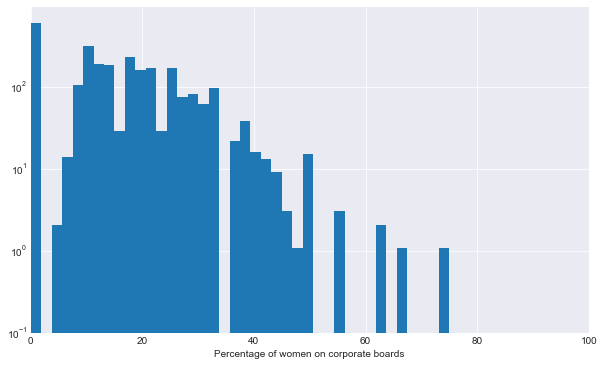

In [100]:
f, ax = plt.subplots()

board_data['% of Women'].hist(bins=40, ax=ax, bottom=0.1)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage of women on corporate boards')
ax.set_yscale('log')